In [3]:
import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf #framework

In [5]:
%matplotlib inline 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
mymodel = tf.keras.models.load_model('/content/drive/MyDrive/model/mnist_fc_epoch20.h5') #model 
mymodel.summary() #check the summary 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [8]:
def showimg(image_bgr): #channel
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image_rgb)
    plt.colorbar()
    plt.grid(False)
    plt.show()
    
    histogram = cv2.calcHist([image_bgr],[0],None,[256],[0,256]) 
    # show the plotting graph of an image 
    plt.plot(histogram) 
    plt.show()  

In [13]:
# theImage = "3_white_on_black_241x219.png"
#theImage = "3_gray_640x480.png"
#theImage = '6.jpg'
#theImage = '3.jpg'
# theImage = '7.jpg'
theImage = '/content/drive/MyDrive/09_train_MNIST/unseen/2.jpg' #select test data randomly

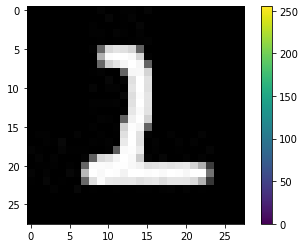

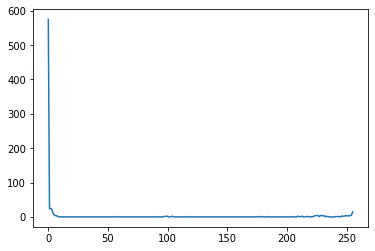

In [14]:
img = cv2.imread(theImage)
#img.resize((28, 28))
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#showimg(gray)
showimg(img)

In [15]:
# Preprocess image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
gray.resize((28, 28))
print( 'Gray shape: ', gray.shape)
vex = np.reshape(gray,784) #if the image size is not 28 X 28, you have to resize the image first, then reshape
print('After reshape: ', vex.shape)
vec = np.expand_dims(np.reshape(gray,784), axis=0) / 255.0  # shape (1, 784)
print('Batched: ', vec.shape)

Gray shape:  (28, 28)
After reshape:  (784,)
Batched:  (1, 784)


In [16]:
x = mymodel.predict(vec) #check the prediction 
print(x)
pred = x.argmax(axis=1)
print('Digit is: ', pred)

[[5.4817648e-16 5.8305246e-01 4.1682157e-01 1.4713073e-06 5.5662876e-15
  1.2430316e-04 1.3873538e-12 2.9364206e-10 2.7621775e-07 3.5008864e-14]]
Digit is:  [1]


SyntaxError: ignored